<h1 style="font-family: TimesNewRoman;">Predicting Income Category Using KNN: Exploring Key Factors</h1>

<h2 style="font-family: TimesNewRoman;">Introduction:</h2>

<p style="font-family: TimesNewRoman;">


Income is essential for an individual’s financial well-being to meet basic requirements and to achieve one's objectives. Income is affected by factors including gender, age, marital status, occupation, and type of employment. Making wise decisions regarding your income, profession, and education requires an understanding of this connection. Through this study, we hope to investigate factors affecting income and forecast income categories using K-Nearest Neighbors (KNN).

**Question we're asking:**

**What are the key factors that contribute to an individual's income category, explore the relationship between these factors and predict the income category based on the classification model?**
    
Our main objective is to identify critical factors influencing income levels and analyze how they connect to various income categories. We will predict income categories based on age, education, occupation, labour class, marital status, and gender using the KNN classification approach. The low and high-income cutoffs are $50,000 and less, respectively.
To address our research question, we will use the "Adult" dataset from the UCI Machine Learning Repository, which comprises 48,000+ records with variables like age, education, employment, job class, marital status, gender, etc. Preprocessing includes data cleansing, conversion, and normalization before KNN classification. We seek to provide insights into the factors impacting income to improve financial well-being.


</p>

<h1 style="font-family: TimesNewRoman;">Preliminary exploratory data analysis:</h1>


<h2 style="font-family: TimesNewRoman;">Loading and Cleaning the data:</h2>

In [ ]:
# Installing necessary packages for data analysis

# install.packages("magrittr")
# install.packages("janitor")
# install.packages("rsample")
# install.packages("tidyverse")
# install.packages("tidymodels")
# install.packages("kknn")

In [1]:
# Loading necessary libraries
library(tidyverse)
library(magrittr)
library(janitor)
library(rsample)
library(class)
library(tidymodels)

── Attaching core tidyverse packages ─────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ───────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes  

In [2]:
# Set the URL for the adult dataset
adult_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_test_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Set the file path to save the downloaded dataset
adult_data_path <- "adult.csv"

# Download the dataset from the specified URL and save it to the specified file path
download.file(adult_data_url, destfile = adult_data_path)
download.file(adult_test_url, destfile = "adult.test.csv")

# Read the downloaded CSV file into a data frame with the specified column names
adult_data_raw <- read_csv(adult_data_path, col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"))
# View the first few rows of the dataset
head(adult_data_raw)

Rows: 32561 Columns: 15
── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# We had the training and testing data already from the source 
# However, we would try to perform the split again so that we can have 
# a new random sample of test data

# Reading testing data and then mergining it with adult_data

adult_test_given <- read_csv("adult.test.csv", col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"), skip=1)

# replace all >50K. with >50k and <=50K. with <=50k
adult_test_given <- apply(adult_test_given, 2, function(x) gsub(">50K.", ">50K", x))
adult_test_given <- apply(adult_test_given, 2, function(x) gsub("<=50K.", "<=50K", x))        
adult_data_raw <- rbind(adult_data_raw, adult_test_given)
head(adult_data_raw)


Rows: 16281 Columns: 15
── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# For classification, it's important to recognize that categorical predictor variables 
# cannot be used in the same way as quantitative ones, at least not without some additional work.
# Removing such variables can simplify the analysis and help ensure that the resulting model is valid and accurate. 
# Therefore, removing all the variables that are cateogrical and only selecting the required ones.

adult_data_raw_final <- select(adult_data_raw, age, fnlwgt, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`, `X15`)
head(adult_data_raw_final)

age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,X15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [6]:
# Start by using "glimpse" to view the column names and data pertaining to the columns
glimpse(adult_data_raw_final)

Rows: 65,123
Columns: 7
$ age              <chr> "39", "50", "38", "53", "28", "37", "49", "52", "31",…
$ fnlwgt           <chr> "77516", "83311", "215646", "234721", "338409", "2845…
$ `education-num`  <chr> "13", "13", "9", "7", "13", "14", "5", "9", "14", "13…
$ `capital-gain`   <chr> "2174", "0", "0", "0", "0", "0", "0", "0", "14084", "…
$ `capital-loss`   <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"…
$ `hours-per-week` <chr> "40", "13", "40", "40", "40", "40", "16", "45", "50",…
$ X15              <chr> "<=50K", "<=50K", "<=50K", "<=50K", "<=50K", "<=50K",…


In [7]:
# Manipulate the name of vectors to make them clean
adult_data_mani_names = tibble::as_tibble(adult_data_raw_final, .name_repair = janitor::make_clean_names)

head(adult_data_mani_names)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [8]:
# Replace all ? with NA
adult_data_clean <- apply(adult_data_mani_names, 2, function(x) gsub("\\?", NA, x))

# Convert to tibble
adult_data_clean <- tibble::as_tibble(adult_data_clean)
                          

# remove rows with any NA values                          
adult_data <- na.omit(adult_data_clean)


# print just the head result                          
head(adult_data)                          


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [9]:
# number of NA Values
sum(is.na(adult_data))

[1] 0

In [10]:
# converting the numeric data from characters to R's native numeric data type

adult_data <- adult_data |>
    rowwise() |>
    mutate(age = as.numeric(age),
           fnlwgt = as.numeric(fnlwgt),
           education_num = as.numeric(education_num),
           capital_gain = as.numeric(capital_gain),
           capital_loss = as.numeric(capital_loss),
           hours_per_week = as.numeric(hours_per_week))

head(adult_data)


age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [11]:
# Select the unique values in the 'x15' column of the 'adult_data' data frame
adult_data |>       # pipe the 'adult_data' data frame to the next step
    select(x15) |>  # select only the 'x15' column
    unique()        # return only the unique values in the 'x15' column


x15
<chr>
<=50K
>50K


In [12]:
# x15 column is the class variable we want to use in the classification model
# changing the name of x15 to income 

adult_data <- adult_data |>
                mutate(income = as_factor(x15)) |>
                select(-x15)

head(adult_data)

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,77516,13,2174,0,40,<=50K
50,83311,13,0,0,13,<=50K
38,215646,9,0,0,40,<=50K
53,234721,7,0,0,40,<=50K
28,338409,13,0,0,40,<=50K
37,284582,14,0,0,40,<=50K


In [13]:
#set the seed
set.seed(1234)

#splitting the dataset into training data and testing data

adult_split <- initial_split(adult_data, prop = 0.75, strata = income)
adult_train <- training(adult_split)
adult_test <- testing(adult_split) 

names(adult_train)

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week" "income"

In [39]:
# Create a summary table for the training data
print("Table 1")
adult_train_summary <- adult_train %>%
  group_by(income) %>%
  summarize(
    n = n(),                            # Number of observations in each class
    mean_age = mean(age),         
    mean_fnlwgt = mean(fnlwgt),       
    mean_education_num = mean(education_num),
    mean_education_capital_gain = mean(capital_gain),
    mean_education_capital_loss = mean(capital_loss),
    mean_hours_per_week = mean(hours_per_week),
    missing_data = sum(is.na(.)),        
    )

adult_train_summary

print("Table 2")
# lets see our predictor class distribution
adult_train |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_train) * 100,) |>
    arrange(desc(percentage))

print("Table 3")
# lets see our predictor class distribution according to age
adult_train |>
  group_by(income) |>
  summarize(
    mean_age = mean(age),
    median_age = median(age),
    sd_age = sd(age),
    min_age = min(age),
    max_age = max(age)
  )

print("Table 4")
# lets see our predictor class distribution according to fnlwgt
adult_train |>
  group_by(income) |>
  summarize(
    mean_fnlwgt = mean(fnlwgt),
    median_fnlwgt = median(fnlwgt),
    sd_fnlwgt = sd(fnlwgt),
    min_fnlwgt = min(fnlwgt),
    max_fnlwgt = max(fnlwgt)
  )

print("Table 5")
# lets see our predictor class distribution according to education_num
adult_train |>
  group_by(income) |>
  summarize(
    mean_education_num = mean(education_num),
    median_education_num = median(education_num),
    sd_education_num = sd(education_num),
    min_education_num = min(education_num),
    max_education_num = max(education_num)
  )

print("Table 6")

# lets see our predictor class distribution according to hours_per_week
adult_train |>
  group_by(income) |>
  summarize(
    mean_hours_per_week = mean(hours_per_week),
    median_hours_per_week = median(hours_per_week),
    sd_hours_per_week = sd(hours_per_week),
    min_hours_per_week = min(hours_per_week),
    max_hours_per_week = max(hours_per_week)
  )



[1] "Table 1"


income,n,mean_age,mean_fnlwgt,mean_education_num,mean_education_capital_gain,mean_education_capital_loss,mean_hours_per_week,missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
<=50K,37192,36.92146,190549.5,9.592923,143.5051,54.33889,38.82397,0
>50K,11649,44.31471,188727.4,11.613529,4130.6628,189.85964,45.48322,0


[1] "Table 2"


income,count,percentage
<fct>,<int>,<dbl>
<=50K,37192,76.14914
>50K,11649,23.85086


[1] "Table 3"


income,mean_age,median_age,sd_age,min_age,max_age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,36.92146,34,14.12427,17,90
>50K,44.31471,44,10.57181,19,90


[1] "Table 4"


income,mean_fnlwgt,median_fnlwgt,sd_fnlwgt,min_fnlwgt,max_fnlwgt
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,190549.5,178858.5,106816.3,12285,1490400
>50K,188727.4,176756.0,103240.5,13769,1226583


[1] "Table 5"


income,mean_education_num,median_education_num,sd_education_num,min_education_num,max_education_num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,9.592923,9,2.442338,1,16
>50K,11.613529,13,2.375653,1,16


[1] "Table 6"


income,mean_hours_per_week,median_hours_per_week,sd_hours_per_week,min_hours_per_week,max_hours_per_week
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,38.82397,40,12.34164,1,99
>50K,45.48322,40,11.24831,1,99


In [38]:
# TODO: LETS MERGE THESE OBSERVATIONS, and refer the table label aka table 1, table 2 table 3...

**Summary Table:**

From the table above, we can make the following observations:

- We have more individuals in the <=50K income category
- The mean age of individuals earning less than or equal to 50K is around 36.6 years old, while those earning above 50K have a mean age of around 44.0 years old.
- The mean fnlwgt (final weight) of individuals earning less than or equal to 50K is around 191150.8, while those earning above 50K have a mean fnlwgt of around 187337.3.
- Those earning above 50K have a higher mean education level as indicated by a higher mean education_num (11.6 compared to 9.6 for those earning less than or equal to 50K).
- Those earning above 50K have a much higher mean capital gain (3968.1) and mean capital loss (201.5) compared to those earning less than or equal to 50K (147.9 and 52.5 respectively).
- Those earning above 50K work on average more hours per week (45.7) compared to those earning less than or equal to 50K (39.3).
- There are no missing values in any of the variables in the training data.

**Observations:**

Based on the tables above, we can make several observations about the data:

- The majority of the data, 75.1%, is in the class of income less than or equal to 50K USD, while only 24.9% of the data is in the class of income greater than $50K.

- The age distribution is relatively similar between the two income classes, with data distributed almost equally over the range of 20-50 years old. However, there are more individuals aged 50 and above in the higher income category.

- The final weight statistics are almost the same in both the income categories, indicating that the weight variable may be redundant for the classification model.

- The education num distribution clearly indicates that people with higher education levels, indicated by a higher education number, are more likely to be in the higher income (> $50K) category.

- The hours per week distribution also suggests that people in the higher income category work considerably more than those in the lower income category, with a difference of almost 7 hours in the mean. This suggests that working longer hours may lead to higher income levels.

Overall, it seems that the age, education_num and hours_per_week variables may be more useful predictors for distinguishing between the two income classes.

In [40]:
# Have a question if we should include those two tables below

# lets see our predictor class distribution according to capital_gain
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_gain = mean(capital_gain),
    median_capital_gain = median(capital_gain),
    sd_capital_gain = sd(capital_gain),
    min_capital_gain = min(capital_gain),
    max_capital_gain = max(capital_gain)
  )

# lets see our predictor class distribution according to capital_loss
adult_train |>
  group_by(income) |>
  summarize(
    mean_capital_loss = mean(capital_loss),
    median_capital_loss = median(capital_loss),
    sd_capital_loss = sd(capital_loss),
    min_capital_loss = min(capital_loss),
    max_capital_loss = max(capital_loss)
  )

income,mean_capital_gain,median_capital_gain,sd_capital_gain,min_capital_gain,max_capital_gain
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,143.5051,0,901.1756,0,41310
>50K,4130.6628,0,15209.6038,0,99999


income,mean_capital_loss,median_capital_loss,sd_capital_loss,min_capital_loss,max_capital_loss
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<=50K,54.33889,0,313.8596,0,4356
>50K,189.85964,0,588.1814,0,3683


# TODO: cut this down as well
**Have a question as well**

**Based on the tables, we can observe that:**

The mean and maximum capital gain values for individuals with income greater than 50K are significantly higher than those with income less than or equal to $50K, suggesting that capital gains may be an important factor in predicting higher income levels.

There is no median capital gain for individuals with income greater than 50K, suggesting that a majority of individuals in this category did not have any capital gains. However, the maximum capital gain value is considerably higher than that for individuals with income less than or equal to $50K.

The mean and maximum capital loss values for individuals with income greater than 50K are also higher than those with income less than or equal to $50K, indicating that capital losses may also be an important factor in predicting higher income levels.

Similar to capital gains, there is no median capital loss value for individuals with income greater than 50K, suggesting that a majority of individuals in this category did not experience any capital losses. However, the maximum capital loss value is considerably higher than that for individuals with income less than or equal to $50K.

Overall, the presence of higher capital gains and losses in the higher income category suggests that these variables may be important predictors of income levels.

In [24]:
names(adult_train)

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week" "income"

In [25]:
glimpse(adult_train)


Rows: 48,841
Columns: 7
Rowwise: 
$ age            <dbl> 39, 50, 28, 37, 49, 23, 32, 34, 25, 32, 54, 35, 43, 59,…
$ fnlwgt         <dbl> 77516, 83311, 338409, 284582, 160187, 122272, 205019, 2…
$ education_num  <dbl> 13, 13, 13, 14, 5, 13, 12, 4, 9, 9, 9, 5, 7, 9, 9, 9, 1…
$ capital_gain   <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ capital_loss   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2042, 0, 0, 0, 0, 1…
$ hours_per_week <dbl> 40, 13, 40, 40, 16, 30, 50, 45, 35, 40, 20, 40, 40, 40,…
$ income         <fct> <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K, <=50K,…


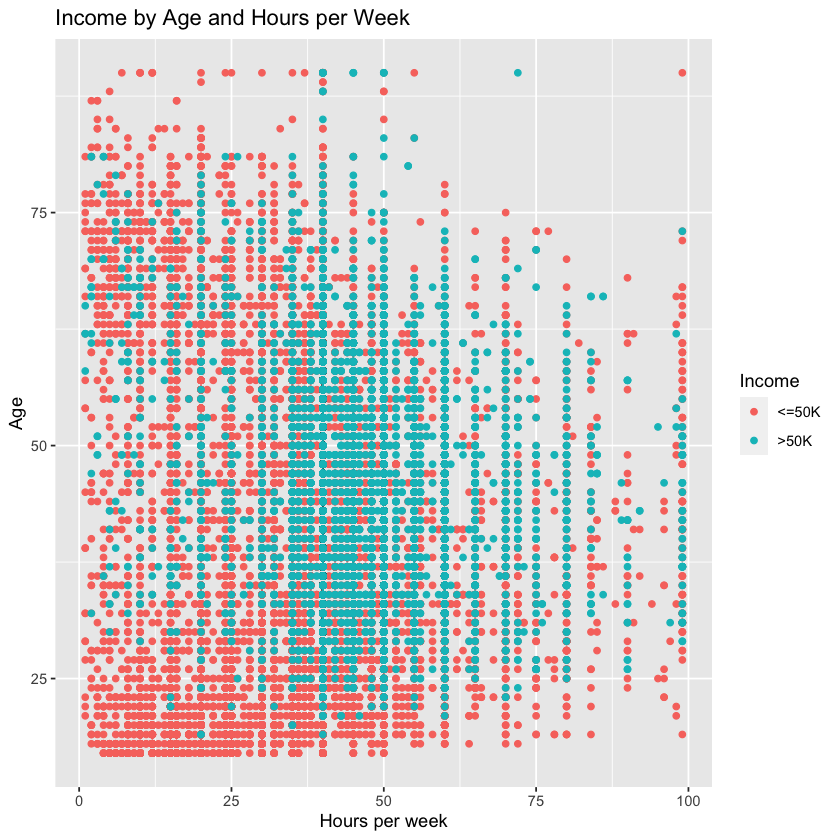

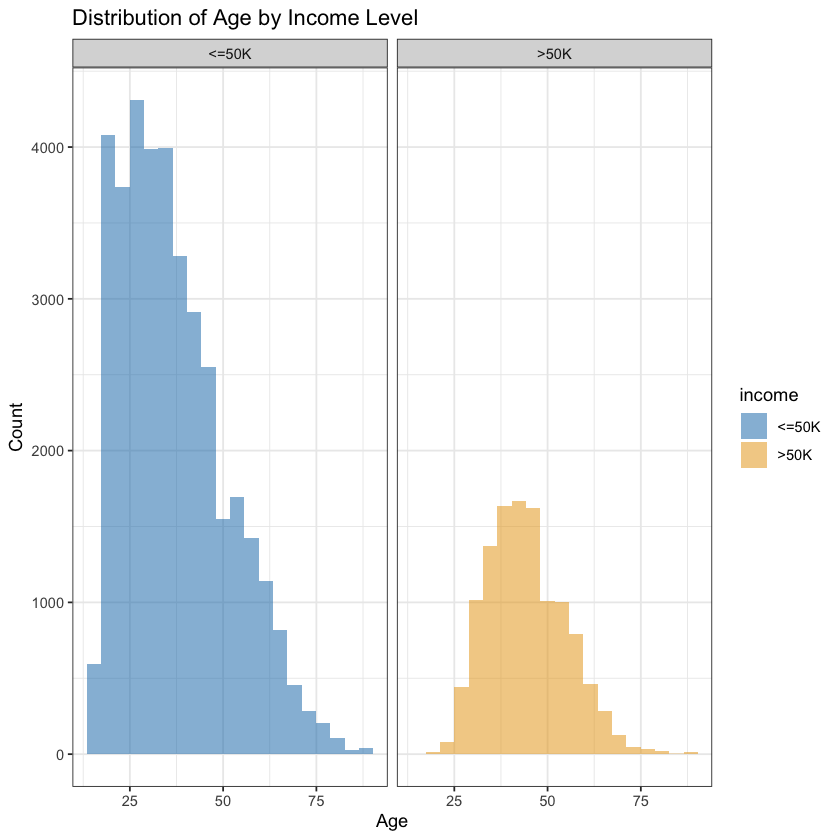

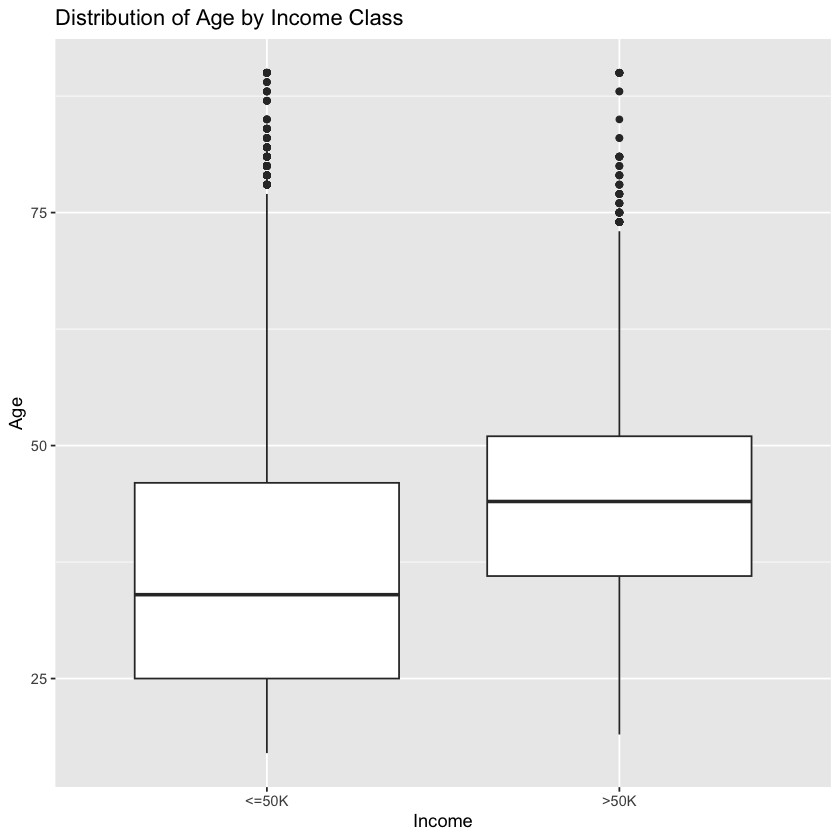

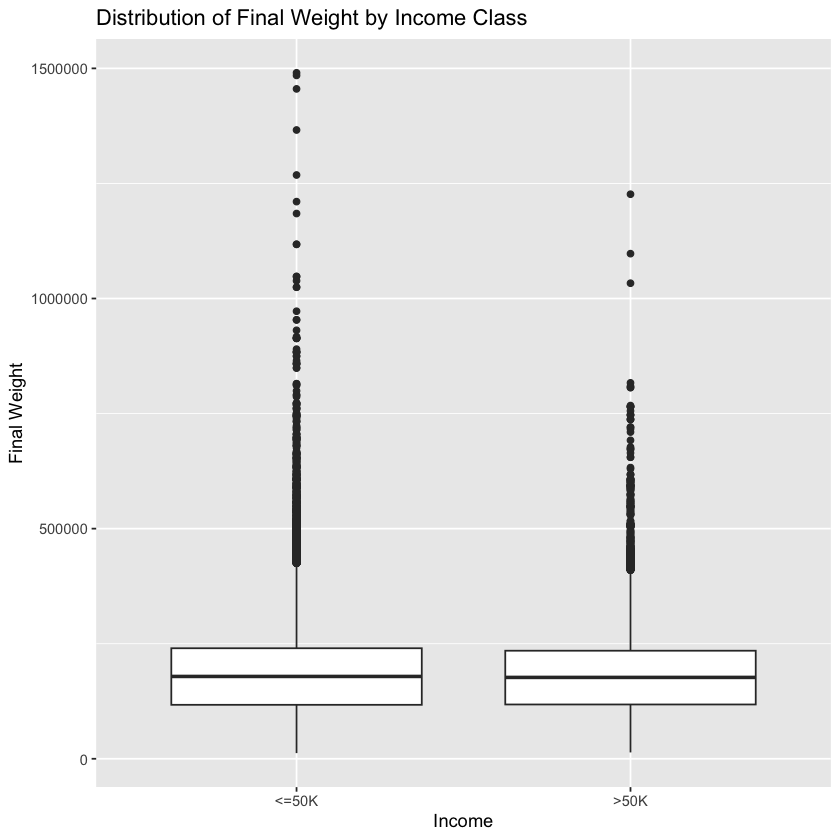

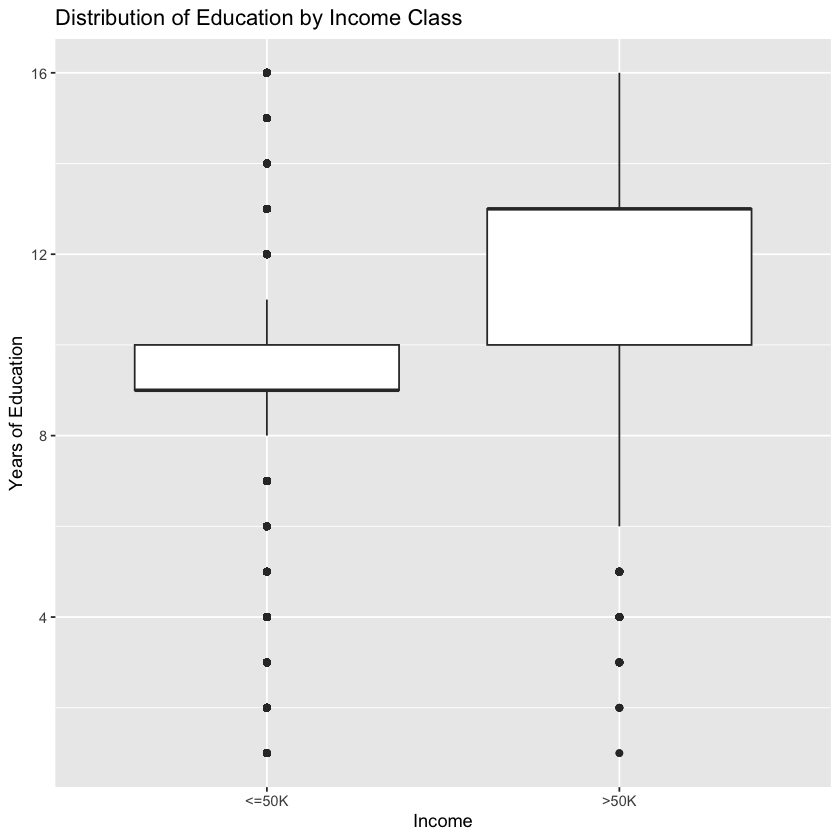

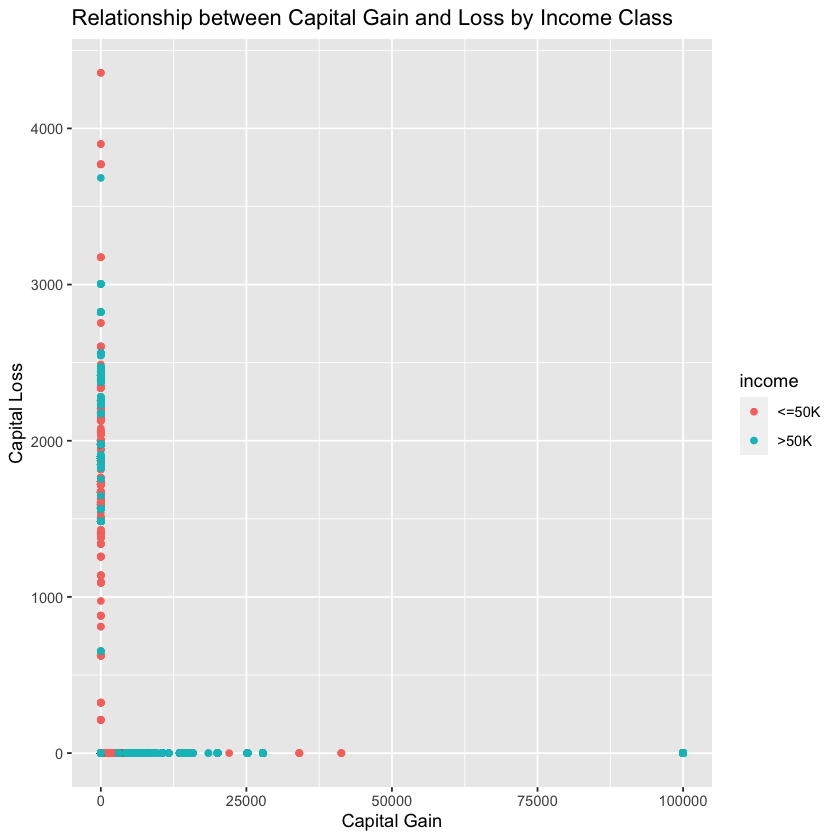

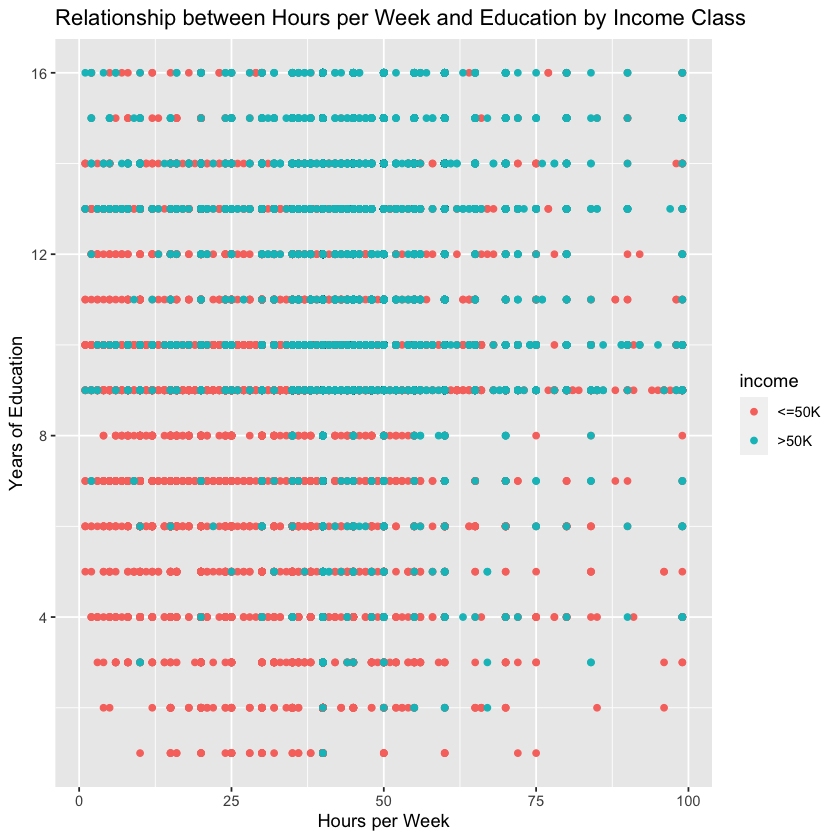

In [35]:
# Scatter plot of hours per week vs. age by income:
ggplot(adult_train, aes(x=hours_per_week, y=age, color=income)) +
  geom_point() +
  labs(x = "Hours per week", y = "Age", color = "Income") +
  ggtitle("Income by Age and Hours per Week")




# Histogram of age by income:
ggplot(adult_train, aes(x=age, fill=income)) +
  geom_histogram(alpha=0.5, position="identity", bins=20) +
  scale_fill_manual(values = c("#0072B2", "#E69F00")) +
  facet_wrap(~income, ncol=2) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Distribution of Age by Income Level") +
  theme_bw()

# New plots

# Distribution of Age by Income Class
ggplot(adult_train, aes(x = income, y = age)) +
  geom_boxplot() +
  labs(x = "Income", y = "Age") +
  ggtitle("Distribution of Age by Income Class")

# Distribution of Final Weight by Income Class
ggplot(adult_train, aes(x = income, y = fnlwgt)) +
  geom_boxplot() +
  labs(x = "Income", y = "Final Weight") +
  ggtitle("Distribution of Final Weight by Income Class")

# Distribution of Education by Income Class
ggplot(adult_train, aes(x = income, y = education_num)) +
  geom_boxplot() +
  labs(x = "Income", y = "Years of Education") +
  ggtitle("Distribution of Education by Income Class")

# TODO: REMOVE CAPITAL GAIN AND LOSS GRAPH?? + give explanation??

# Relationship between Capital Gain and Loss by Income Class
ggplot(adult_train, aes(x = capital_gain, y = capital_loss, color = income)) +
  geom_point() +
  labs(x = "Capital Gain", y = "Capital Loss") +
  ggtitle("Relationship between Capital Gain and Loss by Income Class")

# Relationship between Hours per Week and Education by Income Class
ggplot(adult_train, aes(x = hours_per_week, y = education_num, color = income)) +
  geom_point() +
  labs(x = "Hours per Week", y = "Years of Education") +
  ggtitle("Relationship between Hours per Week and Education by Income Class")





**Observations from plots:**

From the above graphs, we can observe some interesting patterns that shed light on the factors associated with income categories:

- The first graph reveals that age and hours worked do not have a straightforward relationship with income. Instead, there is a sweet spot where individuals in a certain age range and working hours tend to earn more than 50k. This observation suggests that other factors, such as work experience, job responsibilities, and skills, may also contribute to an individual's income beyond just age and working hours.

- The second graph depicts that there is a distinct difference in the distribution of records between the above 50k and below 50k categories, with regards to different age groups. The average is lower in the below 50k class. Whereas in the above 50k class the majority is in the middle ages.

- The third graph depicts again that the distribution of age in the below 50k class is averagely lower compared to the above 50k class.

- The fourth graph depicts the distribution of final weight variable among the income classes, and we can see that it is pretty much the same in both the income classes.

- The fifth graph shows that the education-num is averagely lower in the below 50k category.

- The sixth graph mainly shows that any person with capital gain mainly belongs to the above 50k category. Whereas capital loss is a more compplicated and weird pattern, since if its in the mid ranges then its the 50k cateogry.

- The last graph again shows how higher years of education and higher hours per week mean above 50k category.

<h1 style="font-family: TimesNewRoman;">Methods:</h1>

**For our data analysis: **

- Data must be split into training and testing sets. Training data for classifier prediction are generated. We predict class using the classifier for testing data with unidentified classes.
- To make predictions, we'll use tidy models and the K-Nearest Neighbor Classifier method to form a model from the parsnip R package.
    - To determine the ideal value to utilize as k, we shall cross-validate our results.
    - By providing the model specification and data set to a fit function, we will define a model specification for the K-nearest neighbour and fit the model to the data.
    - We will define the goal variable (i.e., income) and the predictors we plan to utilize in the same step (each variable except the native country)

- Lastly, we will forecast the income group using the predict function.
    - To demonstrate the viability of our methodology, we shall give two separate instances:

### TODO: lets cut this down... and maybe change the "four graphs thing"... also mention v fold cross validation
**By creating four graphs, we will illustrate the outcome and contrast it with the earlier plots:**
- Creating a bar graph of income according to education level
- First, establish a dataset with two columns for income and education level.
- The x-axis would show education level, while the y-axis would show the number of people according to the two-colour income scale.

- Making a scatter plot of hours worked each week by income and age
- First, establish a dataset with three columns for age, education num, and income before moving on to this stage.
- In relation to the income group indicated by two colours, age would be on the x-axis and hours worked per week on the y-axis.
Graphing the distribution of income versus age
First, establish a dataset with two columns for age and income before moving on to this stage.
Age would be shown on the x-axis, and the number of people according to income group would be plotted on the y-axis with two colours, separated from one another in a split view.
Creating a workclass by income bar graph
First, establish a dataset with two columns for workclass and income.
Workclass would be represented by the x-axis, and the number of people in each income level would be shown by the y-axis using two different colours.


### Predictor Variables

#### TODO REFINE THIS... ITS PRETTY ROUGH
After looking at our observations we can see that that fnlwgt can be ignored since the mean median is pretty much the same across both the classes and the distribution is equal so it won't help in classification. From the table we can see capital_gain and capital_loss have a major impact on determining the class.
So ultimately `education_num` `hours_per_week` `capital_gain` `capital_loss` are the predictor variables that will help us determine the income category

In [22]:
# V fold cross validation to choose the best k value for our model engine

set.seed(1234)
adult_vfold <- vfold_cv(adult_train, v = 10, strata = income)

adult_recipe <- recipe(income ~ age + education_num + hours_per_week + capital_gain + capital_loss, data = adult_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(adult_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = adult_vfold, grid = 10) |>
  collect_metrics()



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8277060,10,0.001805633,Preprocessor1_Model01
2,accuracy,binary,0.8274194,10,0.001835473,Preprocessor1_Model02
6,accuracy,binary,0.8247986,10,0.001242749,Preprocessor1_Model04
8,accuracy,binary,0.8245939,10,0.001002704,Preprocessor1_Model05
5,accuracy,binary,0.8243481,10,0.001293218,Preprocessor1_Model03
9,accuracy,binary,0.8242663,10,0.001097246,Preprocessor1_Model06
10,accuracy,binary,0.8241230,10,0.001104033,Preprocessor1_Model07
14,accuracy,binary,0.8240002,10,0.001043913,Preprocessor1_Model10
13,accuracy,binary,0.8237135,10,0.001076739,Preprocessor1_Model09


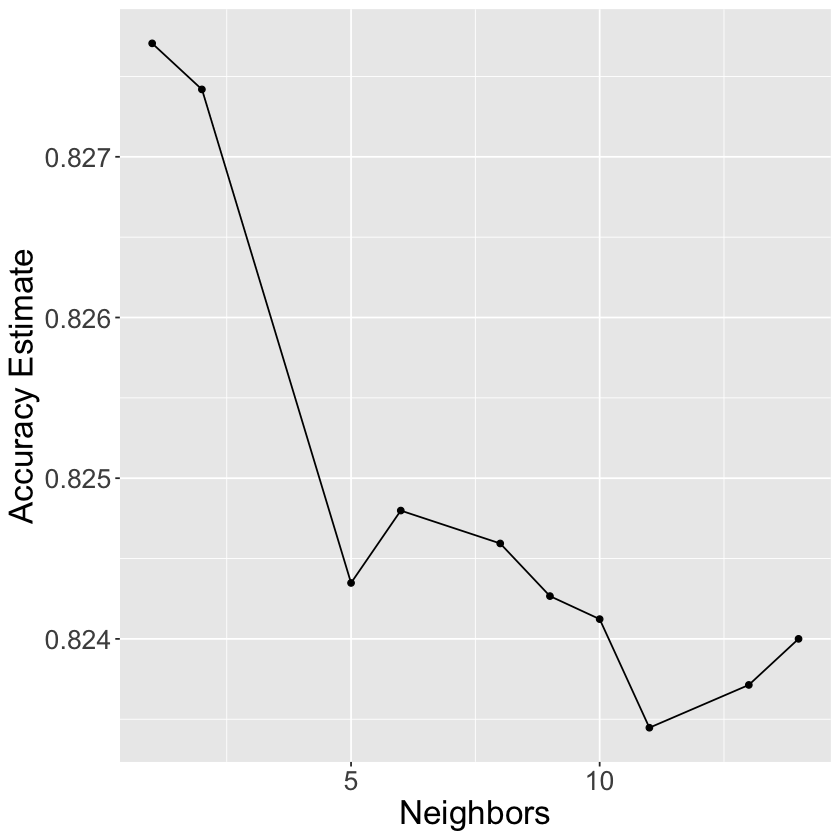

In [23]:
# we check the most opitmal accuracy by plotting the metrics for the k values

accuracies <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(-mean)
accuracies
# Plot of k values against their respective accuracies
cross_val_plot <- accuracies |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
cross_val_plot

From the graph we can see that k = 1 has the highest accuracy estimate, but we chose k = 6 so that we don't overfit our model since k also has almost same accuracy

In [27]:
# using k = 6 for our model

adult_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
  set_engine("kknn") |>
  set_mode("classification")

adult_fit <- workflow() |>
    add_recipe(adult_recipe) |>
    add_model(adult_spec) |>
    fit(data = adult_train)


In [28]:
income_prediction <- predict(adult_fit, adult_test) |>
    bind_cols(adult_test)

adult_acc <- income_prediction |>
    metrics(truth = income, estimate = .pred_class) |>
    select(.metric, .estimate) |>
    head(1)

# confusion matrix
adult_matrix <- income_prediction |>
    conf_mat(truth = income, estimate = .pred_class)


In [29]:
adult_acc
adult_matrix

.metric,.estimate
<chr>,<dbl>
accuracy,0.8241617


          Truth
Prediction <=50K  >50K
     <=50K 11906  2371
     >50K    492  1513

In [30]:
income_prediction <- income_prediction |>
    mutate(income_pred = .pred_class)


In [34]:
# TODO: ggpair stuff


# # Scatter plot of hours per week vs. age by income:
# ggplot(income_prediction, aes(x=hours_per_week, y=age, color=income_pred)) +
#   geom_point() +
#   labs(x = "Hours per week", y = "Age", color = "Income") +
#   ggtitle("Income by Age and Hours per Week")




# # Histogram of age by income:
# ggplot(income_prediction, aes(x=age, fill=income_pred)) +
#   geom_histogram(alpha=0.5, position="identity", bins=20) +
#   scale_fill_manual(values = c("#0072B2", "#E69F00")) +
#   facet_wrap(~income_pred, ncol=2) +
#   xlab("Age") +
#   ylab("Count") +
#   ggtitle("Distribution of Age by Income Level") +
#   theme_bw()

# # New plots

# # Distribution of Age by Income Class
# ggplot(income_prediction, aes(x = income_pred, y = age)) +
#   geom_boxplot() +
#   labs(x = "Income", y = "Age") +
#   ggtitle("Distribution of Age by Income Class")

# # Distribution of Education by Income Class
# ggplot(income_prediction, aes(x = income_pred, y = education_num)) +
#   geom_boxplot() +
#   labs(x = "Income", y = "Years of Education") +
#   ggtitle("Distribution of Education by Income Class")

# # Relationship between Capital Gain and Loss by Income Class
# ggplot(income_prediction, aes(x = capital_gain, y = capital_loss, color = income_pred)) +
#   geom_point() +
#   labs(x = "Capital Gain", y = "Capital Loss") +
#   ggtitle("Relationship between Capital Gain and Loss by Income Class")

# # Relationship between Hours per Week and Education by Income Class
# ggplot(income_prediction, aes(x = hours_per_week, y = education_num, color = income_pred)) +
#   geom_point() +
#   labs(x = "Hours per Week", y = "Years of Education") +
#   ggtitle("Relationship between Hours per Week and Education by Income Class")




<h1 style="font-family: TimesNewRoman;">Expected outcomes and significance:</h1>


# TODO: Name sections Results... and Discussion  in seperate markdown blocks

Based on the data analysis and visualization, we can conclude that certain variables have a significant impact on an individual's income category. Specifically, we found that education level is positively associated with higher income, as we saw a higher proportion of individuals with advanced degrees in the >50k income category. Additionally, certain workclasses, such as those in the private sector, are more likely to have higher incomes compared to those in other workclasses.

However, we also identified potential biases in the data, particularly in variables such as race and sex. For example, we found that a higher proportion of individuals belonging to the white race had higher incomes compared to individuals belonging to other races. Similarly, a higher proportion of males had higher incomes compared to females. These findings raise further questions on the underlying factors contributing to such biases and how they can be addressed.

Overall, our analysis provides insights into the associations between different variables and income categories, highlighting potential areas for further investigation and interventions aimed at addressing inequality in income distribution.

**What do we expect to find?**

We expect to find that certain variables, such as education level, workclass, race, and sex, have a significant impact on an individual's income category. Specifically, we anticipate that individuals with higher education levels and those working in certain workclasses, such as the private sector, are more likely to have higher incomes. Additionally, we expect to find potential biases in the data related to race and sex, with a higher proportion of individuals belonging to certain races or genders having higher incomes compared to others.

**What impact could such findings have?**

These findings could have significant implications for policymakers and organizations focused on addressing income inequality. By identifying the factors that contribute to income disparities, we can develop more targeted interventions and policies aimed at reducing these disparities. For example, our findings may highlight the need for increased investment in education and training programs to provide individuals with the skills and qualifications needed to access higher-paying jobs. Additionally, our findings may underscore the importance of diversity, equity, and inclusion initiatives to address biases related to race and gender in the workplace.

**What future questions could this lead to?**

Our findings may lead to several future questions related to the underlying factors contributing to income disparities. For example, we may want to explore why certain workclasses, such as the private sector, are associated with higher incomes and whether there are ways to promote similar income growth in other workclasses. We may also want to investigate the root causes of biases related to race and gender and how they can be addressed to promote greater equity in income distribution. Finally, our findings may raise questions about the broader societal factors contributing to income inequality, such as access to healthcare, affordable housing, and social services, and how these factors can be addressed to promote greater economic opportunity for all individuals.

**References**

Morgan, J., &amp; David, M. (1963). Education and income. The Quarterly Journal of Economics, 77(3), 423. https://doi.org/10.2307/1879570.  
Investing in education has significant economic benefits, as it increases earning potential and leads to greater productivity in the workforce. To evaluate the economic value of education, it's important to focus on the benefits that can be measured, such as increased earning potential. While annual earnings can reflect productivity, they can also be affected by unemployment and leisure time.

L'équité Salariale au Canada : UN Progrès Inégal. (n.d.). Retrieved April 4, 2023, from https://www.researchgate.net/publication/307513235_L'equite_salariale_au_Canada_un_progres_inegal. 
Although the principle of equal pay for men and women has long been recognized in Canada, it took the demands of human rights commissions and feminist analyses in the 1970s for the discrimination experienced by women in the labor market to be widely seen as a serious social issue. This is a factor that affects one’s yearly income. 

Spurk, D., Abele, A.E. Who Earns More and Why? A Multiple Mediation Model from Personality to Salary. J Bus Psychol 26, 87–103 (2011). https://doi.org/10.1007/s10869-010-9184-3. 
Career success and higher earnings are influenced not only by factors such as education, socio-economic background, and external labor market conditions but also by individual differences. These differences can be categorized into stable variables like personality and malleable variables like expectations and goals.
